In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import librosa
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis

INDEX = 13
DATA_DIR = './new-test-data/test-mfcc-v2' #update with where you stored the file
DATA2_DIR = './new-test-data/test-mfcc-v2-copy'
def aggregate_mfcc_selective(mfcc_data):
    mfcc_selected = mfcc_data[INDEX:, :]
    #features for data from 13-20
    mfcc_mean = np.mean(mfcc_selected, axis=1)
    mfcc_std = np.std(mfcc_selected, axis=1)
    mfcc_max = np.max(mfcc_selected, axis=1)
    mfcc_min = np.min(mfcc_selected, axis=1)
    
    features = np.concatenate([mfcc_mean, mfcc_std, mfcc_max, mfcc_min])
    return features

def aggregate_mfcc_selective2(mfcc_data):
    mfcc_selected = mfcc_data[:3, :] # Select first 20 MFCCs
    
    mfcc_mean = np.mean(mfcc_selected, axis=1)
    mfcc_std = np.std(mfcc_selected, axis=1)
    mfcc_max = np.max(mfcc_selected, axis=1)
    mfcc_min = np.min(mfcc_selected, axis=1)
    
    features = np.concatenate([mfcc_mean, mfcc_std, mfcc_max, mfcc_min])
    return features

# total number of files in the directory
total_files = len(os.listdir(DATA_DIR))
index = 1

# Initialize lists to store features, file names, and labels
mfcc_all_songs = []
file_names = []
generated_features = []
labels = []

total_songs = len(os.listdir(DATA_DIR))
idx = 1

# Iterate over all files in the specified directory
for file_name in os.listdir(DATA_DIR):
        file_path = os.path.join(DATA_DIR, file_name)
        file_path2 = os.path.join(DATA2_DIR, file_name)
        mfcc_data = pd.read_csv(file_path, header=None).values
        mfcc_data = mfcc_data[:20]
        mfcc_data2 = pd.read_csv(file_path2, header=None).values
        # Compute aggregated MFCC features
        aggregated_features = aggregate_mfcc_selective(mfcc_data)
        aggregated_features2 = aggregate_mfcc_selective2(mfcc_data2)

        skewness = skew(mfcc_data, axis=1)
        kurt = kurtosis(mfcc_data, axis=1)
        range_max_min = np.ptp(mfcc_data, axis=1)

        total_energy = np.sum(mfcc_data ** 2, axis=1)
        energy_entropy = -np.sum(mfcc_data ** 2 * np.log(mfcc_data ** 2 + 1e-10), axis=1)
        q25 = np.percentile(mfcc_data, 25, axis=1)
        q75 = np.percentile(mfcc_data, 75, axis=1)
    
        delta_mfcc = librosa.feature.delta(mfcc_data, order=1)
        delta_delta_mfcc = librosa.feature.delta(mfcc_data, order=2)
        

        delta_mean = np.mean(delta_mfcc, axis=1)
        delta_std = np.std(delta_mfcc, axis=1)
        delta_max = np.max(delta_mfcc, axis=1)
        delta_min = np.min(delta_mfcc, axis=1)
        delta_skew = skew(librosa.feature.delta(mfcc_data), axis=1)
        delta_kurtosis = kurtosis(librosa.feature.delta(mfcc_data), axis=1)
        delta_range = np.ptp(librosa.feature.delta(mfcc_data), axis=1)
        delta_total_energy = np.sum(librosa.feature.delta(mfcc_data) ** 2, axis=1)
        delta_energy_entropy = -np.sum(librosa.feature.delta(mfcc_data) ** 2 * np.log(librosa.feature.delta(mfcc_data) ** 2 + 1e-10), axis=1)
        delta_q25 = np.percentile(delta_mfcc, 25, axis=1)
        delta_q75 = np.percentile(delta_mfcc, 75, axis=1)
            
        delta_delta_mean = np.mean(delta_delta_mfcc, axis=1)
        delta_delta_std = np.std(delta_delta_mfcc, axis=1)
        delta_delta_max = np.max(delta_delta_mfcc, axis=1)
        delta_delta_min = np.min(delta_delta_mfcc, axis=1)
        delta_delta_skew = skew(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_kurtosis = kurtosis(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_range = np.ptp(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_total_energy = np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2, axis=1)
        delta_delta_energy_entropy = -np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q25 = np.percentile(delta_delta_mfcc, 25, axis=1)
        delta_delta_q75 = np.percentile(delta_delta_mfcc, 75, axis=1)

    
        delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=1)
        delta_delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=2)
        delta_mean2 = np.mean(delta_mfcc2, axis=1)
        delta_std2 = np.std(delta_mfcc2, axis=1)
        delta_max2 = np.max(delta_mfcc2, axis=1)
        delta_min2 = np.min(delta_mfcc2, axis=1)
        delta_delta_mean2 = np.mean(delta_delta_mfcc2, axis=1)
        delta_delta_std2 = np.std(delta_delta_mfcc2, axis=1)
        delta_delta_max2 = np.max(delta_delta_mfcc2, axis=1)
        delta_delta_min2 = np.min(delta_delta_mfcc2, axis=1)
        delta_delta_range2 = np.ptp(delta_delta_mfcc2, axis=1)  
        delta_delta_total_energy2 = np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2, axis=1)
        delta_delta_energy_entropy2 = -np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q252 = np.percentile(delta_delta_mfcc2, 25, axis=1)
        delta_delta_q752 = np.percentile(delta_delta_mfcc2, 75, axis=1)

        # PCA_mfcc = PCA(n_components=5)
        # PCA_mfcc.fit(mfcc_data.T)
        # PCA_mfcc_features = PCA_mfcc.components_.flatten()

        # Compile all features into a single vector
        features = np.concatenate([
            aggregated_features.flatten(),
            aggregated_features2.flatten(),
            range_max_min.flatten(),
            skewness.flatten(),
            kurt.flatten(),
            total_energy.flatten(),
            energy_entropy.flatten(),
            q25.flatten(),
            q75.flatten(),
            
            delta_mean.flatten(),
            delta_std.flatten(),
            delta_max.flatten(),
            delta_min.flatten(),
            delta_skew.flatten(),
            delta_kurtosis.flatten(),
            delta_range.flatten(),
            delta_total_energy.flatten(),
            delta_energy_entropy.flatten(),
            delta_q25.flatten(),
            delta_q75.flatten(),
            
            delta_delta_mean.flatten(),
            delta_delta_std.flatten(),
            delta_delta_max.flatten(),
            delta_delta_min.flatten(),
            delta_delta_skew.flatten(),
            delta_delta_kurtosis.flatten(),
            delta_delta_range.flatten(),
            delta_delta_total_energy.flatten(),
            delta_delta_energy_entropy.flatten(),
            delta_delta_q25.flatten(),
            delta_delta_q75.flatten(),
            
            delta_mean2.flatten(),
            delta_std2.flatten(),
            delta_max2.flatten(),
            delta_min2.flatten(),
            delta_delta_mean2.flatten(),
            delta_delta_std2.flatten(),
            delta_delta_max2.flatten(),
            delta_delta_min2.flatten(),
            delta_delta_total_energy2.flatten(),
            delta_delta_energy_entropy2.flatten(),
            delta_delta_q252.flatten(),
            delta_delta_q752.flatten(),

            # PCA_mfcc_features.flatten(),
        ])

        # Determine label based on filename pattern
        if file_name.startswith('Asha-Bhosle'):
            label = 'Asha Bhosle'
        elif file_name.startswith('Kishore-Kumar'):
            label = 'Kishore Kumar'
        elif file_name.startswith('Lavni'):
            label = 'Lavni'
        elif file_name.startswith('Michael-Jackson'):
            label = 'Michael Jackson'
        elif file_name.startswith('Jana-Gana-Mana'):
            label = 'Jana-Gana-Mana'
        elif file_name.startswith('Bhavgeet'):
             label = 'Bhavgeet'
        else:
            print(f'Unknown label for file: {file_name}')
            
        print(f'Processed {file_name}')
        print(f'Processed {idx} of {total_songs}')
        generated_features.append(features)
        file_names.append(file_name)
        labels.append(label)
        idx += 1

# Create DataFrame and save to CSV
generated_features = np.vstack(generated_features)
total_features = generated_features.shape[1]
feature_columns = [f'feature_{i}' for i in range(total_features)]

total_data_df = pd.DataFrame(generated_features, columns=feature_columns)
total_data_df.insert(0, 'File', file_names)
total_data_df.insert(1, 'Label', labels)

# Save generated features to 'features_generated.csv'
total_data_df.to_csv(f'features_generated_{INDEX}.csv', index=False)


Processed Asha-Bhosle-23.csv
Processed 1 of 495
Processed Michael-Jackson-55.csv
Processed 2 of 495
Processed Kishore-Kumar-63.csv
Processed 3 of 495
Processed Asha-Bhosle-32.csv
Processed 4 of 495
Processed Jana-Gana-Mana-8-MFCC.csv
Processed 5 of 495
Processed Bhavgeet-47.csv
Processed 6 of 495
Processed Lavni-20.csv
Processed 7 of 495
Processed Bhavgeet-61.csv
Processed 8 of 495
Processed Michael-Jackson-42.csv
Processed 9 of 495
Processed Asha-Bhosle-71.csv
Processed 10 of 495
Processed Bhavgeet-14.csv
Processed 11 of 495
Processed Michael-Jackson-17.csv
Processed 12 of 495
Processed Bhavgeet-18.csv
Processed 13 of 495
Processed Asha-Bhosle-47.csv
Processed 14 of 495
Processed Kishore-Kumar-5-MFCC.csv
Processed 15 of 495
Processed Michael-Jackson-24.csv
Processed 16 of 495
Processed Bhavgeet-5-MFCC.csv
Processed 17 of 495
Processed Michael-Jackson-71.csv
Processed 18 of 495
Processed Jana-Gana-Mana-49.csv
Processed 19 of 495
Processed Asha-Bhosle-66.csv
Processed 20 of 495
Processe

In [4]:

# Splitting the data into features (X) and labels (y)
X = total_data_df.drop(columns=['File', 'Label'])
y = total_data_df['Label']


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Shape of dataset:", total_data_df.shape)
print("\nColumns in dataset:\n", total_data_df.columns)
print("\nFirst 5 rows of the dataset:\n", total_data_df.head())
print("\nData Types of each column:\n", total_data_df.dtypes)
print("\nMissing values in each column:\n", total_data_df.isnull().sum())

print("\nStatistical Summary:\n", total_data_df.describe())
print("\nNumber of duplicate rows:", total_data_df.duplicated().sum())

# plt.figure(figsize=(10, 8))
# sns.heatmap(X, annot=True, cmap='coolwarm', square=True)
# plt.title("Correlation Matrix")
# plt.show()
label_column = 'Label'
print(f"\nLabel distribution in '{label_column}':\n", total_data_df[label_column].value_counts())
# label_column = 'Label'  # Replace 'label' with the actual name of the label column in your dataset
# if label_column in total_data_df.columns:
#     print(f"\nNumber of unique labels in '{label_column}':", df[label_column].nunique())
#     print(f"\nLabel distribution in '{label_column}':\n", df[label_column].value_counts())
# else:
#     print(f"\nWarning: Column '{label_column}' not found in the dataset.")


#Add a Correlation HeatMap

#too many features to analyse the plots of all of them manually 

Shape of dataset: (495, 658)

Columns in dataset:
 Index(['File', 'Label', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7',
       ...
       'feature_646', 'feature_647', 'feature_648', 'feature_649',
       'feature_650', 'feature_651', 'feature_652', 'feature_653',
       'feature_654', 'feature_655'],
      dtype='object', length=658)

First 5 rows of the dataset:
                         File            Label  feature_0  feature_1  \
0         Asha-Bhosle-23.csv      Asha Bhosle -12.033679  -9.780576   
1     Michael-Jackson-55.csv  Michael Jackson  -2.017992   4.719863   
2       Kishore-Kumar-63.csv    Kishore Kumar   2.609654  -4.029758   
3         Asha-Bhosle-32.csv      Asha Bhosle  -7.141288   2.708933   
4  Jana-Gana-Mana-8-MFCC.csv   Jana-Gana-Mana   0.578080   2.455614   

   feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  ...  \
0 -11.141942  -9.832152  -8.217274  -9.227260  -6.950433   9.64

In [6]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with variance below a threshold
selector = VarianceThreshold(threshold=0.1)
print(X.shape)
X_selected = selector.fit_transform(X)
print(X_selected.shape)
X_selected = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])


(495, 656)
(495, 447)


Shape after dropping constant/correlated features: (495, 334)


/home/nirav24/.local/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


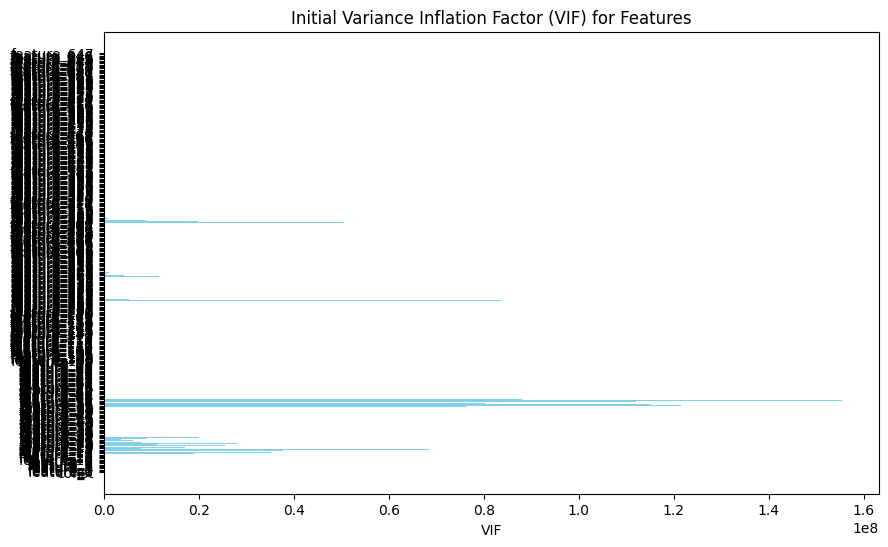


Initial VIF values for each feature:
         Feature         VIF
0          const    0.000000
1      feature_0   16.533267
2      feature_1   17.652723
3      feature_2   24.496965
4      feature_3   17.929310
..           ...         ...
330  feature_643   21.996175
331  feature_644  105.218002
332  feature_645  123.816697
333  feature_646  140.845214
334  feature_647   20.013973

[335 rows x 2 columns]
Dropping feature 'feature_15' with VIF: 35253918.70611701
Dropping feature 'feature_16' with VIF: 37744640.91694992
Dropping feature 'feature_17' with VIF: 68572385.53705548
Dropping feature 'feature_20' with VIF: 25462475.56468728
Dropping feature 'feature_22' with VIF: 28201703.195343822
Dropping feature 'feature_53' with VIF: 76310114.99622314
Dropping feature 'feature_54' with VIF: 121590852.31980336
Dropping feature 'feature_55' with VIF: 114922103.4939386
Dropping feature 'feature_56' with VIF: 80248144.67793187
Dropping feature 'feature_57' with VIF: 112029738.36492977
Droppin

/home/nirav24/.local/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



Final VIF values after dropping features:
         Feature         VIF
0          const    0.000000
1      feature_0   15.951362
2      feature_1   13.566848
3      feature_2   18.502698
4      feature_3   15.279235
..           ...         ...
316  feature_643   20.785529
317  feature_644  100.392501
318  feature_645  122.793494
319  feature_646  139.294620
320  feature_647   19.497128

[321 rows x 2 columns]


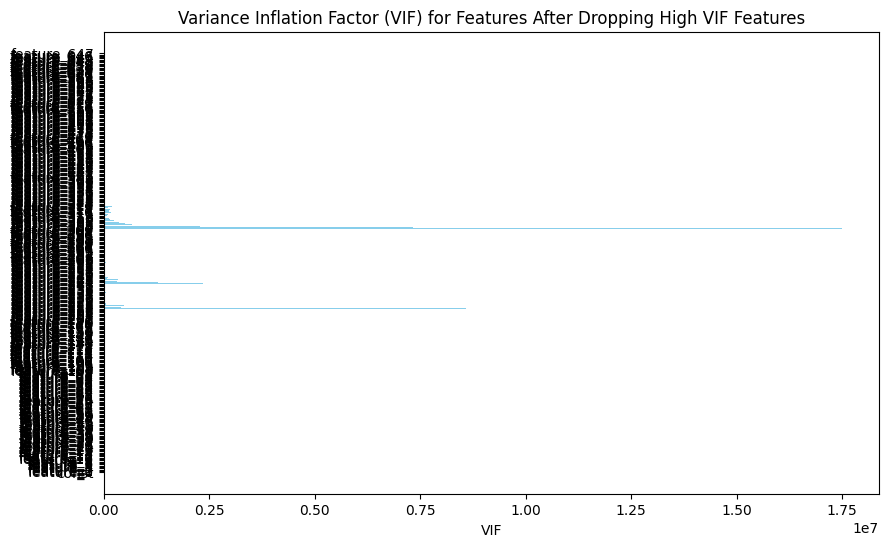


Shape of the dataset after removing high VIF features: (495, 320)


In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_selected is your feature matrix (DataFrame)
# X_selected = your_data

# Check for constant features and drop them
constant_features = X_selected.columns[X_selected.nunique() == 1]
X_selected = X_selected.drop(columns=constant_features)

# Check for highly correlated features and drop them (optional)
corr_matrix = X_selected.corr()
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.95:  # Adjust the threshold as needed
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

X_selected = X_selected.drop(columns=correlated_features)
print(f"Shape after dropping constant/correlated features: {X_selected.shape}")

# Add a constant to the model (for intercept)
X_with_const = sm.add_constant(X_selected)

# Function to calculate VIF for the current dataset
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # Remove infinite or NaN VIF values
    vif_data = vif_data[~vif_data['VIF'].isin([np.inf, -np.inf, np.nan])]
    return vif_data

# Initial VIF calculation
vif_data = calculate_vif(X_with_const)

# Plot initial VIF values
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'], color='skyblue')
plt.xlabel('VIF')
plt.title('Initial Variance Inflation Factor (VIF) for Features')
plt.show()

print("\nInitial VIF values for each feature:")
print(vif_data)

# Define the threshold
threshold = 0.2 * 10**8

# Use a for loop to iterate over the features and remove those with VIF > threshold
features_to_drop = vif_data[vif_data['VIF'] > threshold]['Feature']

# Drop all features that exceed the threshold
for feature in features_to_drop:
    if feature in X_selected.columns:  # Check if the feature exists in X_selected
        print(f"Dropping feature '{feature}' with VIF: {vif_data[vif_data['Feature'] == feature]['VIF'].values[0]}")
        X_selected = X_selected.drop(columns=[feature])

# Recompute VIF for the remaining features
X_with_const = sm.add_constant(X_selected)
vif_data = calculate_vif(X_with_const)

# Display the final VIF values after dropping high VIF features
print("\nFinal VIF values after dropping features:")
print(vif_data)

# Plot VIF after dropping features
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'], color='skyblue')
plt.xlabel('VIF')
plt.title('Variance Inflation Factor (VIF) for Features After Dropping High VIF Features')
plt.show()

# Final shape of the dataset after dropping high VIF features
print(f"\nShape of the dataset after removing high VIF features: {X_selected.shape}")


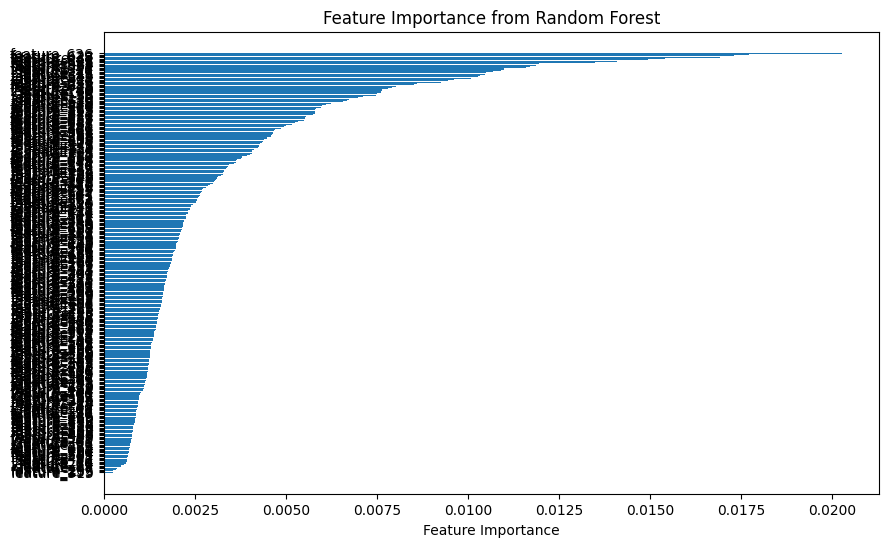

(314,)


In [8]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Fit a random forest model
model = RandomForestClassifier()
model.fit(X_selected, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_idx = importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_selected.columns[sorted_idx], importances[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# Optionally, select features with importance greater than 0.005
selected_features = X_selected.columns[importances > 0.0005]
print(selected_features.shape)
X_selected = X_selected.drop(columns=X_selected.columns[importances < 0.0005])

In [9]:
from sklearn.feature_selection import mutual_info_classif

# Get information gain for each feature
info_gain = mutual_info_classif(X_selected, y)

# Use X_selected.columns to match the feature set size
selected_features = X_selected.columns[info_gain > 0.05]

# Print selected features
print(selected_features)


Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_638', 'feature_639', 'feature_640', 'feature_641',
       'feature_642', 'feature_643', 'feature_644', 'feature_645',
       'feature_646', 'feature_647'],
      dtype='object', length=293)


In [10]:
#method of feature selection 1
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
print(X.shape)

lda = LDA(n_components=3)  # LDA can have a maximum of (number of classes - 1) components
X_reduced = lda.fit_transform(X, y)  # Transformed features for the classification model
print(X_reduced.shape)
#X_reduced

(495, 656)
(495, 3)


In [33]:
#method of feature selection 2
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
print(X.shape)

# Select top k features based on chi-square score
selector = SelectKBest(chi2, k=10)
X_selected = selector.fit_transform(abs(X), y)
print(X_selected.shape)
#X_selected

(495, 656)
(495, 10)


In [12]:
#method of feature selection 3
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define model
model = RandomForestClassifier()
# Initialize RFE and fit to data
rfe = RFE(estimator=model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)
print(X_rfe.shape)

#X_rfe

(495, 10)


In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Convert categorical target to numeric labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Now fit the Lasso model
lasso = Lasso(alpha=0.01).fit(X, y_encoded)
model = SelectFromModel(lasso, prefit=True)
X_lasso = model.transform(X)
print(X_lasso.shape)


(495, 217)


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.470e+02, tolerance: 1.527e-01
  model = cd_fast.enet_coordinate_descent(
/home/nirav24/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [16]:
#method of feature selection 5
from sklearn.decomposition import PCA

# Initialize PCA and fit to data
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_selected)
print(X_pca.shape)


(495, 10)


In [34]:
#method of feature selection 6
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Select top k features based on mutual information score
selector = SelectKBest(mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, y)
print(X_selected.shape)

(495, 10)


In [18]:
#method of feature selection 7
from sklearn.feature_selection import mutual_info_classif

# Get information gain for each feature
info_gain = mutual_info_classif(X, y)
selected_features = X.columns[info_gain > 0.05]
print(selected_features)

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_646', 'feature_647', 'feature_648', 'feature_649',
       'feature_650', 'feature_651', 'feature_652', 'feature_653',
       'feature_654', 'feature_655'],
      dtype='object', length=610)


In [35]:

# Splitting into training (70%) and test (30%) datasets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


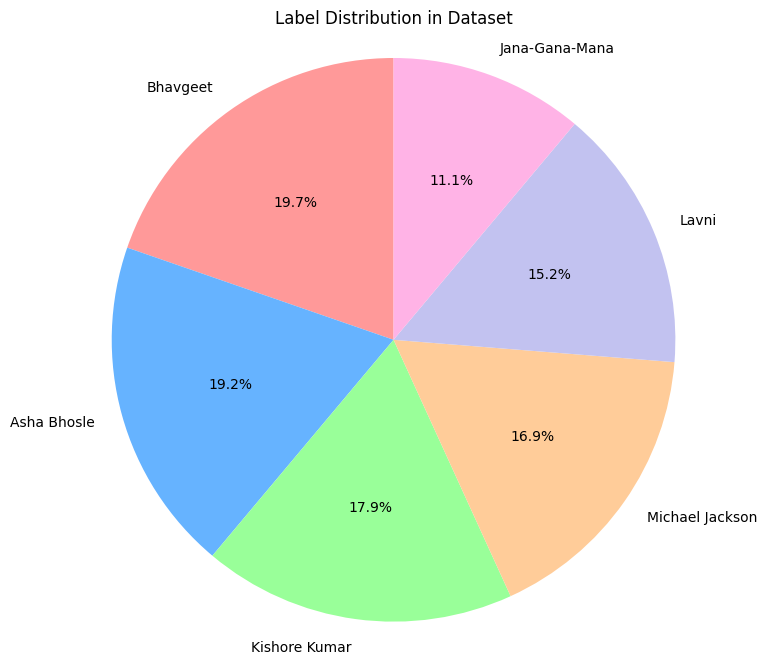

In [36]:

#making a pie chart to show weight of each label
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'labels' is a list of the labels in your dataset (replace it with your actual labels)
labels = ['Asha Bhosale', 'Kishore Kumar', 'Lavni', 'Michael Jackson', 'Jana Gana Mana', 'Bhavgeet']  

# Count the occurrences of each label in the 'labels' column using value_counts
label_counts = y_train.value_counts()

# Data for the pie chart
labels = label_counts.index
sizes = label_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Label Distribution in Dataset')

# Show the chart
plt.show()

In [37]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


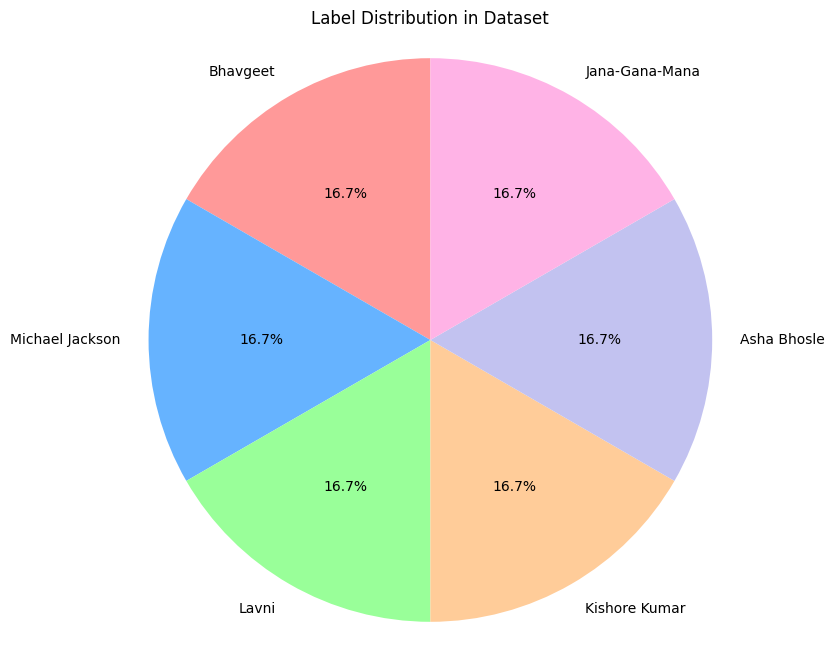

In [38]:
#from the above pie chart we can tell that the data is imbalanced, to fix the data imbalance we can use SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)


# Count the occurrences of each label in the 'labels' column using value_counts
label_counts = y_train.value_counts()

# Data for the pie chart
labels = label_counts.index
sizes = label_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Label Distribution in Dataset')

# Show the chart
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder

#dimensional reduction

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

# Dictionary to store models and results
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    #'SVM': SVC(kernel='rbf', C=1.0, probability=True), # SVC with probability=True for probability estimates
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1),
    # 'SVC_linear': SVC(kernel='linear', probability=True),
    # 'SVC_rbf': SVC(kernel='rbf', probability=True),
    'RandomForest_1': RandomForestClassifier(min_samples_leaf=1),
    'RandomForest_3': RandomForestClassifier(min_samples_leaf=3),
    'RandomForest_5': RandomForestClassifier(min_samples_leaf=5),
    'NeuralNetwork_1': MLPClassifier(hidden_layer_sizes=(5)),
    'NeuralNetwork_2': MLPClassifier(hidden_layer_sizes=(5, 5)),
    'NeuralNetwork_3': MLPClassifier(hidden_layer_sizes=(5, 5, 5)),
    'NeuralNetwork_4': MLPClassifier(hidden_layer_sizes=(10))

}


In [41]:
import plotly.graph_objects as go

results = {}

# Training, prediction, and metric calculations
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train_encoded)  # Train the model
    y_pred_train = model.predict(X_train) #Predict on train set
    y_pred_test = model.predict(X_test)  # Predict on the test set
    
    # Storing metrics
    results[model_name] = {
        "Accuracy_Train": accuracy_score(y_train_encoded, y_pred_train),
        "Accuracy_Test": accuracy_score(y_test_encoded, y_pred_test),
        "Precision": precision_score(y_train_encoded, y_pred_train, average='weighted'),
        "Precision": precision_score(y_test_encoded, y_pred_test, average='weighted'),
        "Recall": recall_score(y_train_encoded, y_pred_train, average='weighted'),
        "Recall": recall_score(y_test_encoded, y_pred_test, average='weighted'),
        "F1 Score": f1_score(y_train_encoded, y_pred_train, average='weighted'),
        "F1 Score": f1_score(y_test_encoded, y_pred_test, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test_encoded, y_pred_test),
        "Classification Report": classification_report(y_train_encoded, y_pred_train),
        "Classification Report": classification_report(y_test_encoded, y_pred_test)
    }

    # Plotting the confusion matrix using Plotly with numbers displayed and square grid
    confusion_mat = results[model_name]["Confusion Matrix"]
    fig = go.Figure(data=go.Heatmap(
        z=confusion_mat,
        x=[f"Predicted {i}" for i in range(len(confusion_mat))],
        y=[f"Actual {i}" for i in range(len(confusion_mat))],
        colorscale="Blues",
        text=confusion_mat,  # Display numbers in each cell
        texttemplate="%{text}",  # Format to show text values
        showscale=True
    ))
    fig.update_layout(
        title=f"Confusion Matrix for {model_name}",
        xaxis_title="Predicted Label",
        yaxis_title="Actual Label",
        xaxis=dict(scaleanchor="y", scaleratio=1)  # Ensures square cells
    )
    fig.show()



Training Logistic Regression...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Training K-Nearest Neighbors...



Training Random Forest...



Training Gradient Boosting...



Training AdaBoost...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.




Training Naive Bayes...



Training Decision Tree...



Training XGBoost...



Training RandomForest_1...



Training RandomForest_3...



Training RandomForest_5...



Training NeuralNetwork_1...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to 


Training NeuralNetwork_2...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to 


Training NeuralNetwork_3...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/ni


Training NeuralNetwork_4...


In [42]:

# Display the results
for model_name, metrics in results.items():
    print(f"\nMetrics for {model_name}:\n")
    for metric, value in metrics.items():
        print(f"{metric}:\n{value}\n")



Metrics for Logistic Regression:

Accuracy_Train:
0.5747863247863247

Accuracy_Test:
0.6868686868686869

Precision:
0.6883464975570239

Recall:
0.6868686868686869

F1 Score:
0.6826291168217218

Confusion Matrix:
[[ 9  6  0  1  4  1]
 [ 1 12  0  0  1  1]
 [ 0  0 11  0  2  0]
 [ 2  0  0 19  0  0]
 [ 2  1  0  0  7  4]
 [ 1  0  3  0  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.43      0.50        21
           1       0.63      0.80      0.71        15
           2       0.79      0.85      0.81        13
           3       0.95      0.90      0.93        21
           4       0.47      0.50      0.48        14
           5       0.62      0.67      0.65        15

    accuracy                           0.69        99
   macro avg       0.68      0.69      0.68        99
weighted avg       0.69      0.69      0.68        99



Metrics for K-Nearest Neighbors:

Accuracy_Train:
0.7136752136752137

Accuracy_Test:
0.6363

In [43]:
print("\nAll Models Accuracy:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Accuracy_Train']:.4f}", f"{model_name}: {metrics['Accuracy_Test']:.4f}")


All Models Accuracy:
Logistic Regression: 0.5748 Logistic Regression: 0.6869
K-Nearest Neighbors: 0.7137 K-Nearest Neighbors: 0.6364
Random Forest: 0.9957 Random Forest: 0.7374
Gradient Boosting: 0.9957 Gradient Boosting: 0.7374
AdaBoost: 0.5876 AdaBoost: 0.6061
Naive Bayes: 0.6047 Naive Bayes: 0.6566
Decision Tree: 0.9124 Decision Tree: 0.7172
XGBoost: 0.9957 XGBoost: 0.7374
RandomForest_1: 0.9957 RandomForest_1: 0.7475
RandomForest_3: 0.9338 RandomForest_3: 0.7475
RandomForest_5: 0.8526 RandomForest_5: 0.7778
NeuralNetwork_1: 0.4209 NeuralNetwork_1: 0.4444
NeuralNetwork_2: 0.2564 NeuralNetwork_2: 0.2727
NeuralNetwork_3: 0.1688 NeuralNetwork_3: 0.2121
NeuralNetwork_4: 0.1111 NeuralNetwork_4: 0.1111


In [44]:
print("\nAll Models Precison:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Precision']:.4f}")


All Models Precison:
Logistic Regression: 0.6883
K-Nearest Neighbors: 0.6363
Random Forest: 0.7704
Gradient Boosting: 0.7556
AdaBoost: 0.5997
Naive Bayes: 0.6925
Decision Tree: 0.7516
XGBoost: 0.7717
RandomForest_1: 0.7697
RandomForest_3: 0.7855
RandomForest_5: 0.8251
NeuralNetwork_1: 0.2533
NeuralNetwork_2: 0.2771
NeuralNetwork_3: 0.0450
NeuralNetwork_4: 0.0688


In [45]:
print("\nAll Models Recall:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Recall']:.4f}")


All Models Recall:
Logistic Regression: 0.6869
K-Nearest Neighbors: 0.6364
Random Forest: 0.7374
Gradient Boosting: 0.7374
AdaBoost: 0.6061
Naive Bayes: 0.6566
Decision Tree: 0.7172
XGBoost: 0.7374
RandomForest_1: 0.7475
RandomForest_3: 0.7475
RandomForest_5: 0.7778
NeuralNetwork_1: 0.4444
NeuralNetwork_2: 0.2727
NeuralNetwork_3: 0.2121
NeuralNetwork_4: 0.1111


In [46]:
print("\nAll Models f1-Score:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['F1 Score']:.4f}")


All Models f1-Score:
Logistic Regression: 0.6826
K-Nearest Neighbors: 0.6273
Random Forest: 0.7423
Gradient Boosting: 0.7390
AdaBoost: 0.5882
Naive Bayes: 0.6496
Decision Tree: 0.7043
XGBoost: 0.7400
RandomForest_1: 0.7521
RandomForest_3: 0.7539
RandomForest_5: 0.7831
NeuralNetwork_1: 0.3140
NeuralNetwork_2: 0.2483
NeuralNetwork_3: 0.0742
NeuralNetwork_4: 0.0841


In [47]:
#show decision boundary
#ROC Curve

In [48]:
#identify the three songs of each category
#showcase the waveform for each of the three songs found for each category